# Laboratorio di Simulazione Numerica
## Esercitazione 8

### Esercizio 08.1
In questo esercizio scriviamo un codice in grado di calcolare il valore di aspettazione di una Hamiltoniana su una certa funzione d'onda. In particolare vogliamo utilizzare questo codice per studiare il *ground state* di una Hamiltoniana unidimensionale $H$ il cui potenziale è dato da $V(x) = x^4 - \frac{5}{2}x^2$ (in unità in cui $\hbar = 1$, $m = 1$ e $k_B = 1$). Vogliamo sfruttare i principi variazionali per determinare una funzione d'onda e un valore di energia che approssimano quelli del *ground state* di $H$.
Le funzioni d'onda di prova (non normalizzate) che consideriamo sono:

$$
\Psi_T^{\sigma,\mu}(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

Abbiamo quindi una famiglia  a due parametri di funzioni d'onda. Boi dobbiamo trovare quei valori di $\mu$ e $\sigma$ che minimizzano il valore di aspettazione dell'Hamiltoniana:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2}
$$

Per eseguere questo calcolo vogliamo campionare la distribuzione di probabilità $|\Psi_T(x)|^2$ per poi stimare l'energia come:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

Per il campionamento di $|\Psi_T(x)|^2$ utiliazziamo l'algoritmo di Metropolis, in modo andalogo all'esercitazione 5.
Per cui riprendiamo le classi che avevamo creato nell'esercitazione 5:

- La classe **Metropolis** (definita in *metropolis.h*), in cui sono definiti i metodi per compiere i passi dell'algoritmo di metropolis seondo una certa matrice di transizione (in questa esercitazione consideriamo una matrice di transizione $T(y|x)$ uniforme).

- La classe madre **ProbabilityDensity** (definita in *probabilityDensity.h*) e le classi figlie (definite in *pdf.h*), che servono per specificare quale densità di probabilità vogliamo campionare con l'algoritmo di metropolis.

Il codice con cui stimiamo i valori dei parametri che minimizzano il valore di aspettazione dell'energia è scritto in *variational.cpp*. Nel file sono anche definite le funzioni **LocalEnergy** e **EnergyEstimate**: la prima calcola il valore di ${\hat H} \Psi_T(x)/\Psi_T(x)$ dati i parametri $\mu$ e $\sigma$, la seconda è invece la funzione in cui viene eseguita la simulazione vera e propria con l'algoritmo di metropolis, sfruttando anche il metodo del *data blocking* per stimare l'incertezza. 

#### Equilibrazione

Dobbiamo ora stimare qual è il  numero di passi adeguato per la fase di equilibrazione. Per stabilire quando il sistema è equilibrato guardiamo l'andamento del valore della distanza dall'origine, cioè di $|x|$. In generale dobbiamo trovare un valore che possa andare bene per diverse combinazioni dei parametri $\mu$ e $\sigma$. Studiamo la fase di equilibrazione in tre casi differenti, tenendo $\mu = 1$ e ponendo $\sigma = 0.5$, $\sigma = 1.0$, e $\sigma = 2.0$, per avere diversi rapporti fra i due parametri. In ciascun test partiamo da una configurazione iniziale pari a: $x = 12\mu = 12$ e guardiamo quando il grafico di $|x|$ in funzione degli step comincia ad oscillare attorno a  un certo valore. Di seguito sono riportati i tre grafici.

<img src="equilibration/equilibration_1.0_0.5.png" width="640">
<img src="equilibration/equilibration_1.0_1.0.png" width="640">
<img src="equilibration/equilibration_1.0_2.0.png" width="640">

Osserviamo che $100$ step sono sufficienti per equilibrare il sistema.
In questa fase dobbiamo anche stabilire qual'è la larghezza della probabilità di transizione uniforme (il membro **m_step** della classe **Metropolis**) in modo da avere un rate di accettazzione intorno al $50%$. Il rate di accettazzione dipenderà dal parametro $\sigma$ che rappresenta la larghezza delle Gaussiane che costituiscono la funzione d'onda di prova. Per cui cerchiamo un valore $k$ tale che ponendo lo larghezza del passo pari a $k\sigma$ si ottiene il rate desderato. Facendo un po' di test si è visto che un buon valore per $k$ è $2.8$, in questo caso i rate di accettazione sono:
    
- $57,9\%$  per  $\sigma=1.0$
- $49,6\%$  per  $\sigma=0,5$
- $43,8\%$  per  $\sigma=2.0$


#### Simulazione
La simulazione effettiva per la stima dell'energia e dell'incertezza (implementata nella funzione **EnergyEstimate**) viene effettuata tramite $20$ blocchi da $5000$ step, per un totale di $10^5$ step.

### Esercizio 08.2
Adesso dobbiamo determinare i valori di $\mu$ e $\sigma$ che minimmizzano l'energia. Guardando l'andamento del potenziale (in particolare la poszione dei minimi e la larghezza delle buche) stabiliamo di andare studiare gli intervalli di valori:
$$\mu \in [0.3 , 1.3]$$ $$\sigma \in [0.5, 1.5]$$.
Entrambi gli intervalli vengono divisi in $100$ sottointervalli, e si calcola il valor medio dell'energia per ogni combinazione di paramaetri in modo da trovare il minimo.
Il codice *variational.cpp* implementa questo calcolo variazionale.
Alla fine i valori dei parametri che minimizzano $\langle {\hat H} \rangle_T$ sono:
$$
\mu = 0.80 \\
\sigma = 0.62
$$

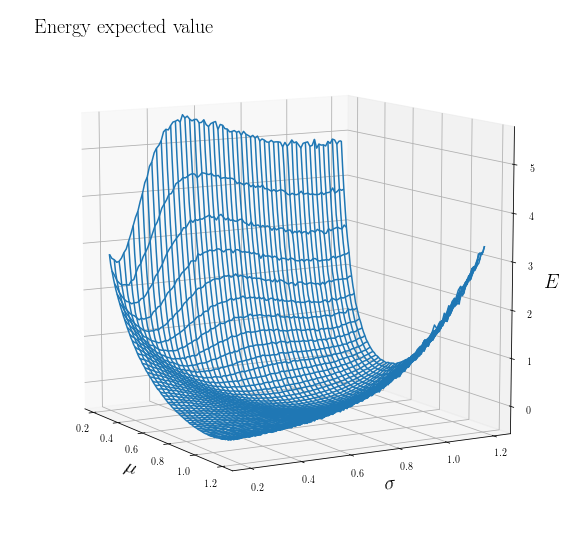

In [3]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

E = np.loadtxt('graph3D/energy_estimates.dat')

mu = np.linspace(0.2, 1.2, 101)
sigma = np.linspace(0.2, 1.2, 101)
MU, SIGMA = np.meshgrid(mu, sigma)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(MU, SIGMA, E, rstride=2, cstride=2)
ax.set_xlabel('$\mu$', fontsize=20)
ax.set_ylabel('$\sigma$', fontsize=20)
ax.set_zlabel('$E$', fontsize=20)
ax.text2D(0.05, 0.95, "Energy expected value", transform=ax.transAxes, fontsize=20)
ax.view_init(10, -30)

plt.show()


Nel file *ground_state.cpp* c'è il codice per studiare lo stato determinato sopra, cioè quello che approssima meglio il ground state dell'Hamiltoniana. Vengono prodotti i file contentnti i valori dell'energia e l'incertezza al variare del numero di blocchi (file *energy.out*) e il file contenente tutte le configurazioni esplorate dall'algoritmo di metropolis (file *positions.out*).
Di seguito è mostrato il grafico dell'andamento del valore medio dell'energia e dell'incertezza al variare del numero di blocchi, per il set di parametri determinato sopra.

Ground state energy:  -0.4453523599
Uncertainty:  0.001620177132


[]

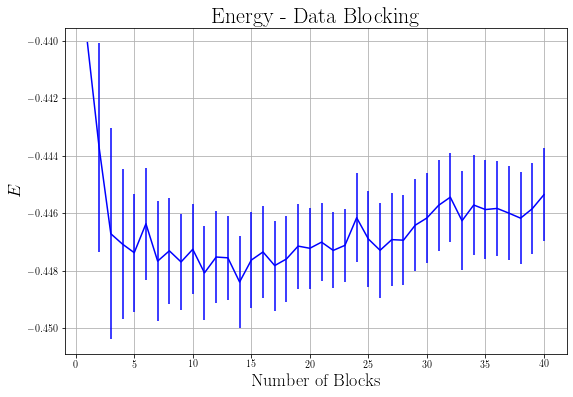

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)

E, errE = np.loadtxt("energy.out", usecols = (0,1), delimiter=' ', unpack ='true')
x = np.arange(len(E)) +1 

print("Ground state energy: ", E[len(E)-1])
print("Uncertainty: ", errE[len(E)-1])

plt.figure(figsize=(9,6))
plt.errorbar(x, E, yerr=errE, color='blue')
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('$E$', fontsize=18)
plt.title('Energy - Data Blocking', fontsize=22)
plt.grid(True)

plt.plot()

Vogliamo analizzare la distribuzione di probabilità determinata con il metodo variazionale. Il modulo quadro della funzione d'onda di prova è:

$$
|\Psi_T^{\sigma,\mu}(x)|^2 = e^{-\frac{(x-\mu)^2}{\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{\sigma^2}} + 2 e^{-\frac{[(x+\mu)^2 + (x+\mu)^2]}{2\sigma^2}}
$$

Costruiamo un Istogramma dei valori della posizione $x$ e nello stesso grafico mettiamo il grafico dell'espressione analitica della Distribuzione di prova e anche quello della autofunzione determinata determinata numericamente trasformando l'equazione di Schrodinger in una equazione matriciale.

Ground state energy:  -0.46046587969271535


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


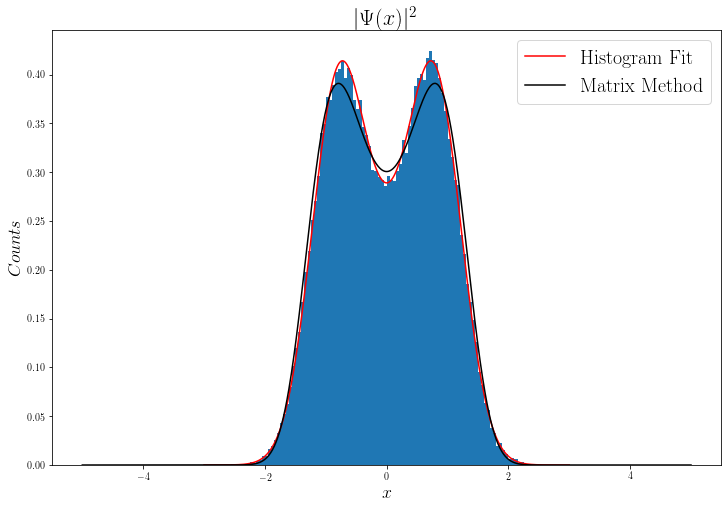

(1000,)


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

x = np.loadtxt("positions.out", usecols=(0), delimiter=' ', unpack='true')
mu = 0.8
sigma = 0.62

def f(x,k):  # defining the fitting function for psi100
    return k*( np.exp(-((x-mu)**2)/(2*sigma**2)) + np.exp(-((x+mu)**2)/(2*sigma**2)) )**2

plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x, 120,range = (-3.0,3.0), density='true')

bin_centers = bins[:-1] + np.diff(bins) / 2  # we want to fit the centers of the bins of the histogram
kopt, _ = curve_fit(f, bin_centers, n, p0=[4000.]) # the starting value of the parameter is determined watching the hist
x_interval_for_fit = np.linspace(bins[0], bins[-1], 10000) 
plt.plot(x_interval_for_fit, f(x_interval_for_fit, *kopt), color = 'r', label='Histogram Fit')

plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$Counts$', fontsize=18)
plt.title(r'$|\Psi(x)|^2$', fontsize=22)

##### Matrix Method ###############
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])

plt.plot(x,(psi[0])**2,color='black', label='Matrix Method')
plt.legend(fontsize='20')

plt.show()

### Esercizio 08.3
In questo esercizio utilizziamo il codice di Path Integral Monte Carlo (PIMC) e Path Integral Ground State (PIGS) fornito durante le lezioni e confrontiamo i risultati con quelli ottenuti nei due esercizi precedenti.
Innanzitutto modifichiamo la parte di codice nel file *qmc1d.cpp* in cui sono descritti il potenziale studiato e la funzione d'onda di partenza considerata.
In particolare, nel caso dell'algoritmo per il PIGS, considerimao prima come funzione d'onda di partenza la funzione costante uguale a 1, dopodichè rieseguiamo la simulazione partendo dalla funzione di prova determinata negli esercizi precedenti. Vogliamo confrontare le due simulazioni per stabilire di quanto possiamo ridurre il tempo di propagazione immaginario scegliendo una funzione d'onda di partenza simile a quella vera del *ground state*.

Siccome utilizziamo ancora l'algoritmo di Metropolis vogliamo ancora garantire di avere dei valori di accettazione intorno al $50\%$. Il programma fornisce al termine dell'esecuzione i valori di accettazione per le Ricostruzioni di Brownian Motion e di di Brownian Bridge, oltre che alla traslazione delle molecole. Per cui i parametri da modificare sono quelli relativi a quante ricostruzioni delle molecole (**brownianBridgeReconstructions** e **brownianMotionReconstructions**) e l'ampiezza delle traslazioni (**delta_translation**). L'algoritmo di Metropolis procede per $8\cdot 10^4$ divisi in 20 blocchi per poter valutare l'errore con il data blocking.

Gli altri parametri di input da scegliere sono il tempo di propagazione immaginario (che corrisponde a $\beta$ nel caso del PIMC) e il numero di timeslices (che corrisponde anche al numero di unità della catena molecolare).
Nel caso del PIGS, per fare un confronto fra i risultati ottenuti partendo da una funzione costante e quelli ottenuti partendo dalla funzione ricavata con i metodi variazionali guardiamo i grafici che mostrano le stime di energia potenziale e cinetica al variare dei timeslices. In realta consideriamo principalmente quella potenziale perchè l'energia cinetica è molto fluttuante a causa del metodo con cui viene calcolata. In entrambi i casi i risultati vengono poi confrontati con quelli ottenuti negli esercizi precedenti e la soluzione col metodo delle matrici tramite un istogramma delle posizioni campionate e il valore di energia del ground state. Il calcolo dell'energia non dà problemi poichè l'operatore hamiltoniano commuta con l'operatore di propagazione e quindi possiamo valutare l'energia comme somma di energia cinetica e potenziale in un qualsiasi punto della catena molecolare. In particolare lo valutiamo agli estremi perchè in questi punti l'energia cinetica è meno fluttuante e ha incertezze minori. 

## PIGS

### $\Psi_0(x) = 1$
In questo caso scegliamo un tempo di propagazione pari a $8$ e un numero di timeslices pari a $500$

Energy:
-0.463615
uncertainty:
0.006134434943211966


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


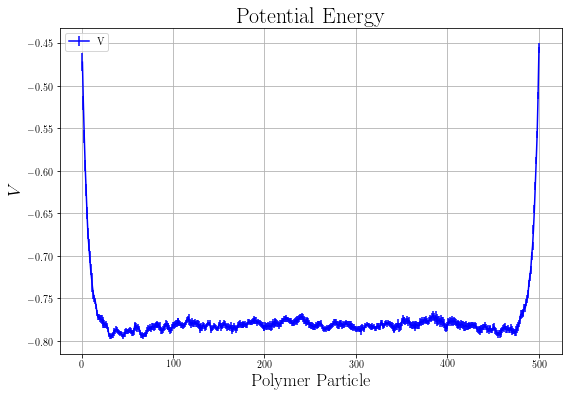

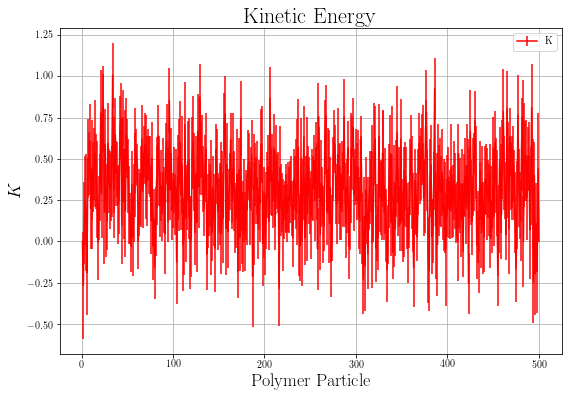

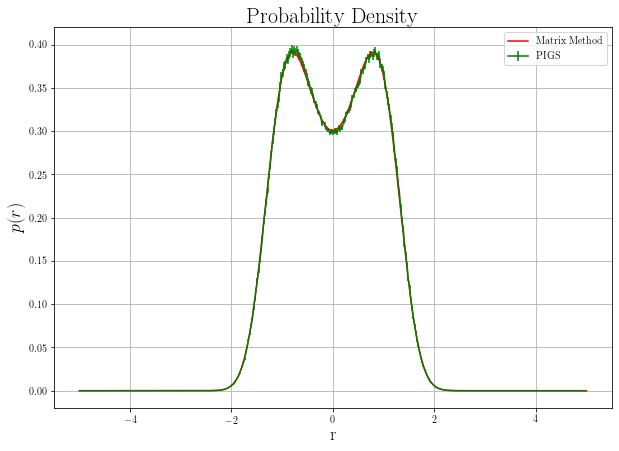

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)

V, errV = np.loadtxt("QMC_1D/PIGS_constant/potential.dat", usecols = (1,2), delimiter=' ', unpack ='true')
K, errK = np.loadtxt("QMC_1D/PIGS_constant/kinetic.dat", usecols = (1,2), delimiter=' ', unpack ='true')
t = np.arange(len(V)) +1

pos, N, errN = np.loadtxt("QMC_1D/PIGS_constant/probability.dat", usecols = (0,1,2), delimiter=' ', unpack ='true')

plt.figure(figsize=(9,6))
plt.errorbar(t, V, yerr=errV, color='blue', label='V')
plt.xlabel('Polymer Particle', fontsize=18)
plt.ylabel('$V$', fontsize=18)
plt.title('Potential Energy', fontsize=22)
plt.legend()
plt.grid(True)

plt.figure(figsize=(9,6))
plt.errorbar(t, K, yerr=errK, color='red', label='K')
plt.xlabel('Polymer Particle', fontsize=18)
plt.ylabel('$K$', fontsize=18)
plt.title('Kinetic Energy', fontsize=22)
plt.legend()
plt.grid(True)

print("Energy:")
print((V[0]+K[0] + V[-1]+K[-1])/2)
print("uncertainty:")
print(np.sqrt(errV[0]**2 +errK[0]**2 + errV[-1]**2+errK[-1]**2)/2)

plt.figure(figsize=(10,7))
plt.errorbar(pos, N, yerr=errN, color='green', label='PIGS')
plt.plot(x,(psi[0])**2,color='red', label='Matrix Method')
plt.xlabel('r', fontsize=18)
plt.ylabel(r'$p(r)$',fontsize=18)
plt.title('Probability Density', fontsize=22)
plt.legend()
plt.grid(True)

plt.show()

## $\Psi_0(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}}+ e^{-\frac{(x+\mu)^2}{2\sigma^2}}$
In questo caso scegliamo un tempo di propagazione pari a $3$ e un numero di timeslices pari a $200$

Energy:
-0.46116999999999997
uncertainty:
0.003538935278766765


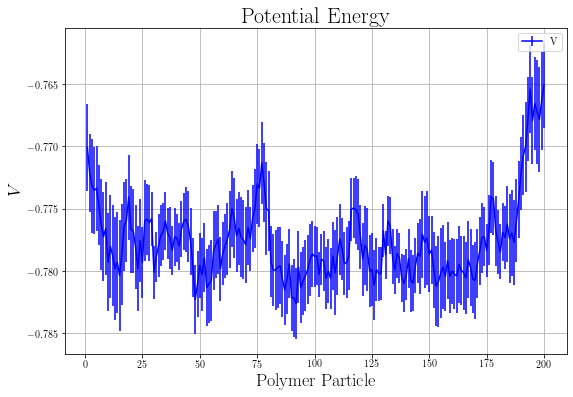

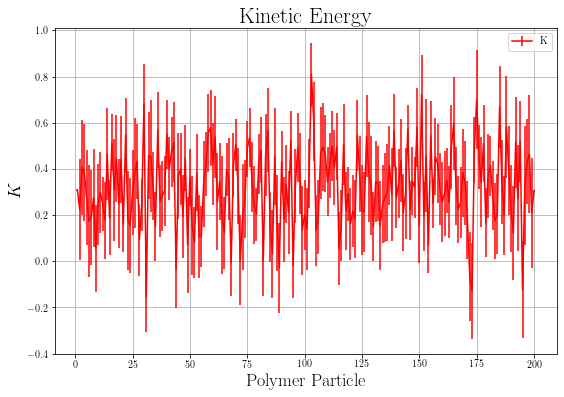

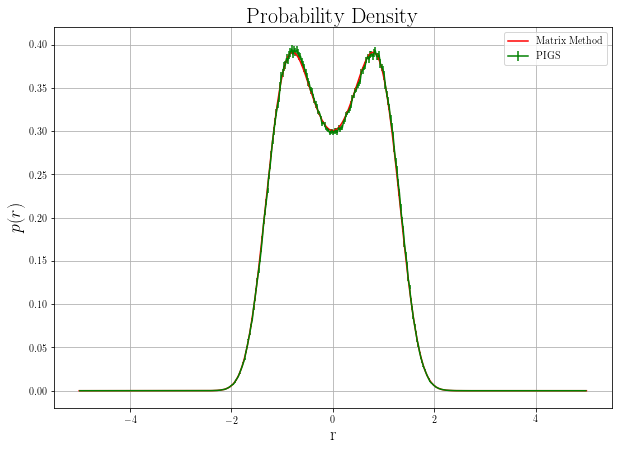

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)

V, errV = np.loadtxt("QMC_1D/PIGS_variational/potential.dat", usecols = (1,2), delimiter=' ', unpack ='true')
K, errK = np.loadtxt("QMC_1D/PIGS_variational/kinetic.dat", usecols = (1,2), delimiter=' ', unpack ='true')
t = np.arange(len(V)) +1 

pos, N, errN = np.loadtxt("QMC_1D/PIGS_constant/probability.dat", usecols = (0,1,2), delimiter=' ', unpack ='true')

plt.figure(figsize=(9,6))
plt.errorbar(t, V, yerr=errV, color='blue', label='V')
plt.xlabel('Polymer Particle', fontsize=18)
plt.ylabel('$V$', fontsize=18)
plt.title('Potential Energy', fontsize=22)
plt.legend()
plt.grid(True)

plt.figure(figsize=(9,6))
plt.errorbar(t, K, yerr=errK, color='red', label='K')
plt.xlabel('Polymer Particle', fontsize=18)
plt.ylabel('$K$', fontsize=18)
plt.title('Kinetic Energy', fontsize=22)
plt.legend()
plt.grid(True)

print("Energy:")
print((V[0]+K[0] + V[-1]+K[-1])/2)
print("uncertainty:")
print(np.sqrt(errV[0]**2 +errK[0]**2 + errV[-1]**2+errK[-1]**2)/2)

plt.figure(figsize=(10,7))
plt.errorbar(pos, N, yerr=errN, color='green', label='PIGS')
plt.plot(x,(psi[0])**2,color='red', label='Matrix Method')
plt.xlabel('r', fontsize=18)
plt.ylabel(r'$p(r)$',fontsize=18)
plt.title('Probability Density', fontsize=22)
plt.legend()
plt.grid(True)

plt.show()

In entrambi i casi si trovano dei risultati consistenti con quanto visto negli esercizi precedenti, in particolare guardando i grafici delle densità di probabilià campionate si vede che sono molto simili alla funzione determinata con il metodo delle matrici. Guardando il grafico dell'energia potenziale si osserva il comportamento atteso per cui i valoriconvergono nelle regioni centrali della catena molecolare, in cui sia il *bra* che il *ket* sono stati propagati in una certa misura, quindi si osserva un certo "pianerottolo" nella regione centrale. Però nel caso della funzione ottenuta coi metodi variazionali è stato necessario un tempo di propagazione minore (la metà) rispetto alla funzione costante per ottenere questo pianerottolo.
I valori stimati di energia totale con le rispettive incertezze sono poi compatibili con i risultati trovati con il metodo delle matrici. In particolare

## PIMC

Adesso vogliamo vedere cosa succcede aumentando la temperatura, in particolare simuliamo tramite il metodo PIMC una miscela statistica che descrive un insieme canonico quantistico a una certa temperatura T.
L'unica cosa che cambiamo del codice è il file di input, in cui dobbiamo specificare la temperatura che vogliamo simulare.
Esguiamo una simulazione a 5 diverse temperature: $T=1.5$, $T=5$, $T=10$, $T=15$, $T=20$. In ciascuna guardiamo come varia l'istogramma delle posizioni rispetto alla soluzione del ground state. Inoltre valutiamo anche l'energia media della miscela. Siccome con il PIMC stiamo considerando una catena molecolare chiusa, non c'è una unità preferita in cui calcolare i valori di energia. Quindi come stima del valore medio dell'energia consideriamo la media aritmetica su tutti i timeslices.

### T = 1.5 

Energy average:
0.1516668


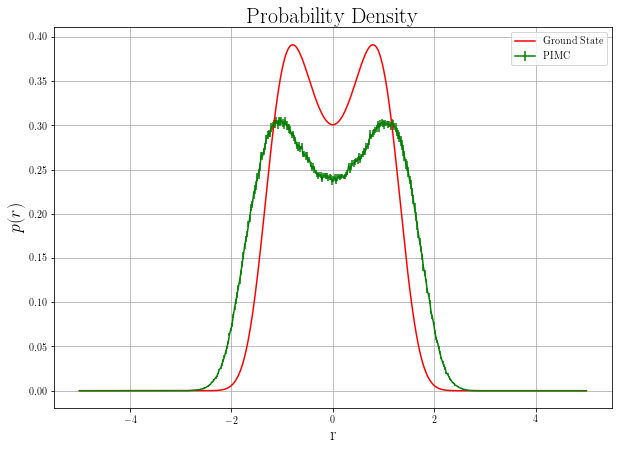

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)

V, errV = np.loadtxt("QMC_1D/PIMC/potential_1.5.dat", usecols = (1,2), delimiter=' ', unpack ='true')
K, errK = np.loadtxt("QMC_1D/PIMC/kinetic_1.5.dat", usecols = (1,2), delimiter=' ', unpack ='true')
t = np.arange(len(V)) +1 

E_average = np.mean(V+K)

print("Energy average:")
print(E_average)

pos, N, errN = np.loadtxt("QMC_1D/PIMC/probability_5.0.dat", usecols = (0,1,2), delimiter=' ', unpack ='true')

plt.figure(figsize=(10,7))
plt.errorbar(pos, N, yerr=errN, color='green', label='PIMC')
plt.plot(x,(psi[0])**2,color='red', label='Ground State')
plt.xlabel('r', fontsize=18)
plt.ylabel(r'$p(r)$',fontsize=18)
plt.title('Probability Density', fontsize=22)
plt.legend()
plt.grid(True)

plt.show()

### T = 5

Energy average:
2.3614143999999997


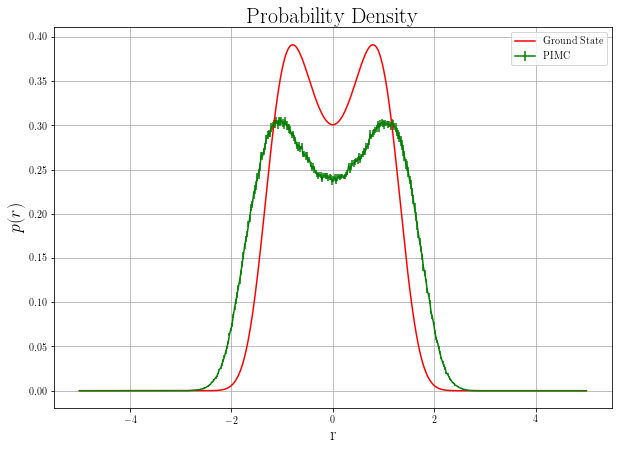

In [9]:
V, errV = np.loadtxt("QMC_1D/PIMC/potential_5.0.dat", usecols = (1,2), delimiter=' ', unpack ='true')
K, errK = np.loadtxt("QMC_1D/PIMC/kinetic_5.0.dat", usecols = (1,2), delimiter=' ', unpack ='true')
t = np.arange(len(V)) +1 

E_average = np.mean(V+K)

print("Energy average:")
print(E_average)

pos, N, errN = np.loadtxt("QMC_1D/PIMC/probability_5.0.dat", usecols = (0,1,2), delimiter=' ', unpack ='true')

plt.figure(figsize=(10,7))
plt.errorbar(pos, N, yerr=errN, color='green', label='PIMC')
plt.plot(x,(psi[0])**2,color='red', label='Ground State')
plt.xlabel('r', fontsize=18)
plt.ylabel(r'$p(r)$',fontsize=18)
plt.title('Probability Density', fontsize=22)
plt.legend()
plt.grid(True)

plt.show()

### T =10

Energy average:
5.7667205333333325


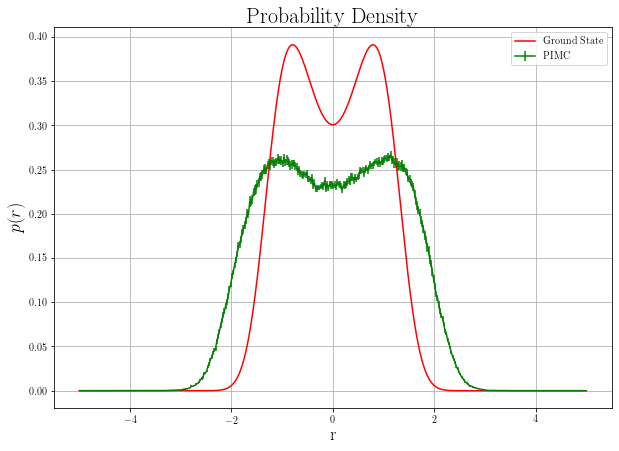

In [10]:
V, errV = np.loadtxt("QMC_1D/PIMC/potential_10.0.dat", usecols = (1,2), delimiter=' ', unpack ='true')
K, errK = np.loadtxt("QMC_1D/PIMC/kinetic_10.0.dat", usecols = (1,2), delimiter=' ', unpack ='true')
t = np.arange(len(V)) +1 

E_average = np.mean(V+K)

print("Energy average:")
print(E_average)

pos, N, errN = np.loadtxt("QMC_1D/PIMC/probability_10.0.dat", usecols = (0,1,2), delimiter=' ', unpack ='true')

plt.figure(figsize=(10,7))
plt.errorbar(pos, N, yerr=errN, color='green', label='PIMC')
plt.plot(x,(psi[0])**2,color='red', label='Ground State')
plt.xlabel('r', fontsize=18)
plt.ylabel(r'$p(r)$',fontsize=18)
plt.title('Probability Density', fontsize=22)
plt.legend()
plt.grid(True)

plt.show()

### T = 15

Energy average:
9.235745000000001


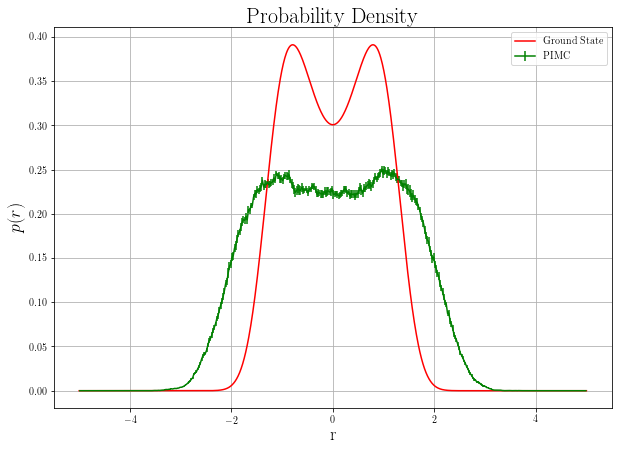

In [11]:
V, errV = np.loadtxt("QMC_1D/PIMC/potential_15.0.dat", usecols = (1,2), delimiter=' ', unpack ='true')
K, errK = np.loadtxt("QMC_1D/PIMC/kinetic_15.0.dat", usecols = (1,2), delimiter=' ', unpack ='true')
t = np.arange(len(V)) +1 

E_average = np.mean(V+K)

print("Energy average:")
print(E_average)

pos, N, errN = np.loadtxt("QMC_1D/PIMC/probability_15.0.dat", usecols = (0,1,2), delimiter=' ', unpack ='true')

plt.figure(figsize=(10,7))
plt.errorbar(pos, N, yerr=errN, color='green', label='PIMC')
plt.plot(x,(psi[0])**2,color='red', label='Ground State')
plt.xlabel('r', fontsize=18)
plt.ylabel(r'$p(r)$',fontsize=18)
plt.title('Probability Density', fontsize=22)
plt.legend()
plt.grid(True)

plt.show()

### T = 20

Energy average:
12.783264333333333


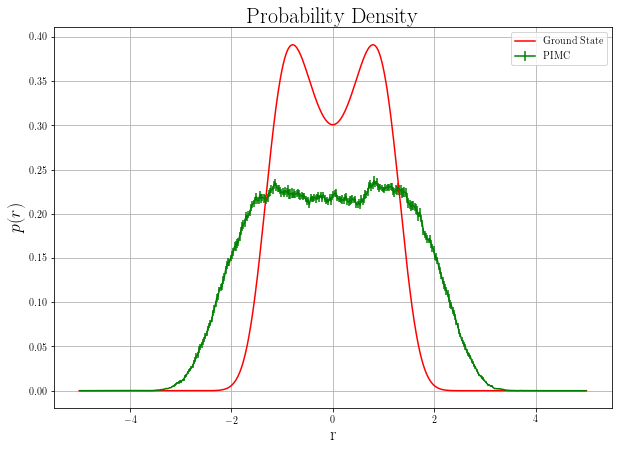

In [12]:
V, errV = np.loadtxt("QMC_1D/PIMC/potential_20.0.dat", usecols = (1,2), delimiter=' ', unpack ='true')
K, errK = np.loadtxt("QMC_1D/PIMC/kinetic_20.0.dat", usecols = (1,2), delimiter=' ', unpack ='true')
t = np.arange(len(V)) +1 

E_average = np.mean(V+K)

print("Energy average:")
print(E_average)

pos, N, errN = np.loadtxt("QMC_1D/PIMC/probability_20.0.dat", usecols = (0,1,2), delimiter=' ', unpack ='true')

plt.figure(figsize=(10,7))
plt.errorbar(pos, N, yerr=errN, color='green', label='PIMC')
plt.plot(x,(psi[0])**2,color='red', label='Ground State')
plt.xlabel('r', fontsize=18)
plt.ylabel(r'$p(r)$',fontsize=18)
plt.title('Probability Density', fontsize=22)
plt.legend()
plt.grid(True)

plt.show()

Si vede come aumentando la temperatura, l'istogramma delle posizioni campionate si allarghi sempre di più, come ci aspettiamo visto che nella miscela deiventano sempre più rilevatnti gli stati ad alta energia. Inoltre si vede come il minimo locale al centro vada scomparendo mano a mano che si aumenta la temperatura, perchè effettivamente gli stati a energia più alta sono meno influenzati dal fatto che il potenziale presenta una doppia buca.